In [ ]:
Task 9

Data Preprocessing

In [28]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('BostonHousing.csv')

In [30]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [31]:
df.shape

(506, 14)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [33]:
# Check for any missing values 
print("Checking for missing values:")
df.isnull().sum()

Checking for missing values:


crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [34]:
# Impute missing values with the mean 
df['rm'].fillna(df['rm'].mean(), inplace=True)

In [35]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [36]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
print(duplicate_rows)

Number of duplicate rows: 0
Empty DataFrame
Columns: [crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat, medv]
Index: []


Exercise 1: Load a dataset (e.g., the Boston Housing dataset from Scikit-Learn) and prepare the data for linear 
regression (e.g., split into training and testing sets).

In [37]:
# Split the dataset into features and target
X = df.drop('medv', axis=1)
y = df['medv']

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Exercise 2: Implement linear regression using Scikit-Learn. Fit the model to the training data.

In [39]:
# linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

Exercise 3: Predict the target variable for the test set using the fitted linear regression model.

In [40]:
# Predict on the test data
y_pred = model.predict(X_test)

Exercise 4: Calculate the Mean Squared Error (MSE) of the linear regression model on the test set.

In [41]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE) on the test set: {mse}")

Mean Squared Error (MSE) on the test set: 24.40482518814621


Exercise 5: Calculate the R-squared value of the linear regression model on the test set.

In [42]:
from sklearn.metrics import r2_score

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)

print(f"R-squared (R²) value on the test set: {r2}")


R-squared (R²) value on the test set: 0.6672089705941917


Exercise 6: Plot the regression line along with the actual data points to visually assess the model's performance.

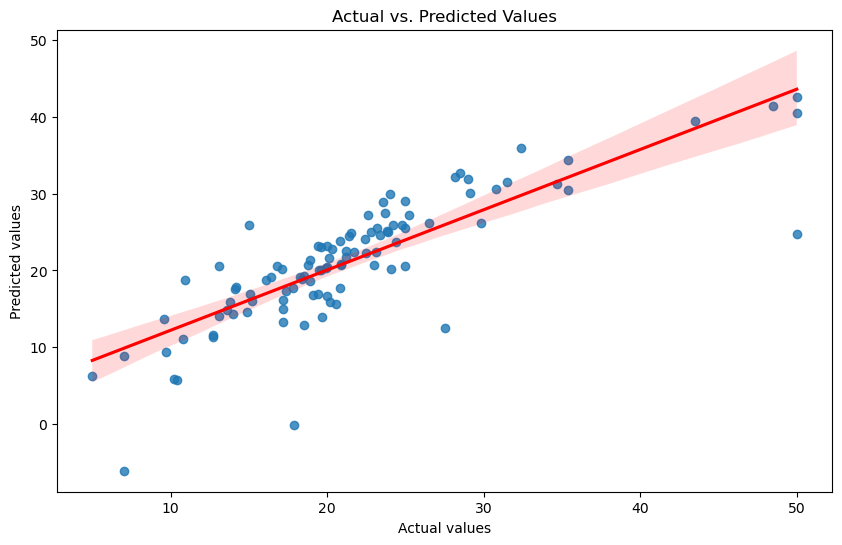

In [43]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Scatter plot of the actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.regplot(x='Actual', y='Predicted', data=results, line_kws={"color": "red"})
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted Values')
plt.show()


Exercise 7: Evaluate the model's performance by comparing the predicted values with the actual values. 
Create a scatter plot of the predicted vs. actual values.

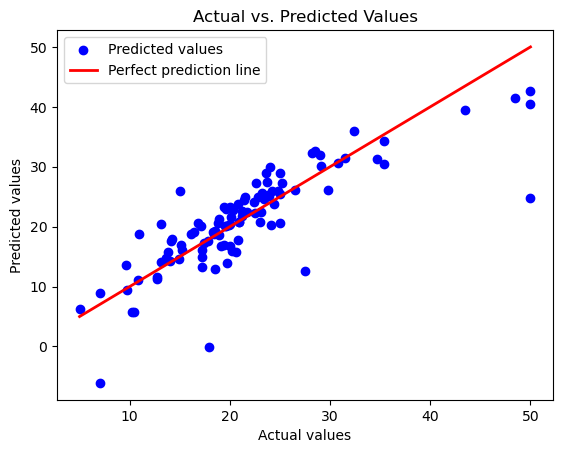

In [44]:
import matplotlib.pyplot as plt

# Scatter plot of the actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect prediction line')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


Exercise 8: Interpret the coefficients of the linear regression model. Explain the impact of each feature on the target variable.

In [45]:
# Access the coefficients
coefficients = model.coef_

if not df.empty:
  try:
    
      feature_names = list(df.columns)
      print(feature_names)
  except:
      print("Error: Issue extracting feature names. Check column names in df.")
      feature_names = []  

  if feature_names:
      print("Coefficients:")
      for i, coef in enumerate(coefficients):
          if coef > 0:
              relationship = "positive"
          elif coef < 0:
              relationship = "negative"
          else:
              relationship = "no"
          print(f"- {feature_names[i]}: {relationship} relationship with target variable (coefficient: {coef:.2f})")
  else:
      print("No features found for interpretation. Check your data or feature names.")
else:
  print("Error: Dataframe seems empty. Please check your data.")



['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']
Coefficients:
- crim: negative relationship with target variable (coefficient: -0.11)
- zn: positive relationship with target variable (coefficient: 0.03)
- indus: positive relationship with target variable (coefficient: 0.04)
- chas: positive relationship with target variable (coefficient: 2.79)
- nox: negative relationship with target variable (coefficient: -17.19)
- rm: positive relationship with target variable (coefficient: 4.43)
- age: negative relationship with target variable (coefficient: -0.01)
- dis: negative relationship with target variable (coefficient: -1.44)
- rad: positive relationship with target variable (coefficient: 0.26)
- tax: negative relationship with target variable (coefficient: -0.01)
- ptratio: negative relationship with target variable (coefficient: -0.92)
- b: positive relationship with target variable (coefficient: 0.01)
- lstat: negative relationshi